<a href="https://colab.research.google.com/github/Sanu3286/Heart_Attack_Prediction_A-classification-problem/blob/main/Heart_Attack_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required librery

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error,accuracy_score
from math import sqrt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()
import io

Saving heart.csv to heart.csv


### Reading dataset

In [ ]:
## reading dataset
df=pd.read_csv('/content/heart.csv')  

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## dataset
age: age of the person
sex: Gender of the person
cp: Chest pain 
trtbps: blood pressure
chol: cholestrol level
fbs: fasting blood sugar>120 (1 true ,0 false)
restecg:electrocardiographic result
thalachh: minimum heart rate achieved
exng: exercise induced angina (1 =yes , 0=No)
oldpeak: previous peak

# data cleaning and EDA 

### Data visuallization

In [ ]:
## checking shape of dataset
df.shape


(303, 14)

In [ ]:
##checking data type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


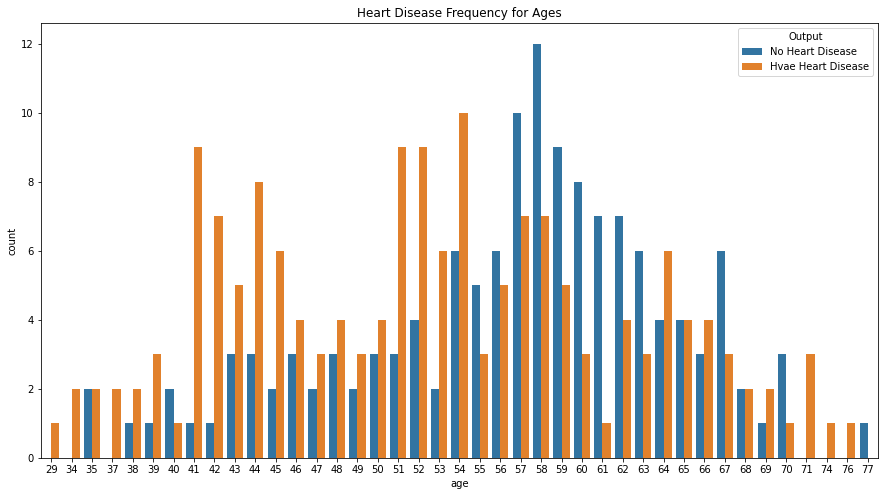

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'age', hue = 'output', data = df).set_title('Heart Disease Frequency for Ages')
plt.legend(title = 'Output', loc = 'upper right', labels = ['No Heart Disease', 'Hvae Heart Disease'])
plt.show()

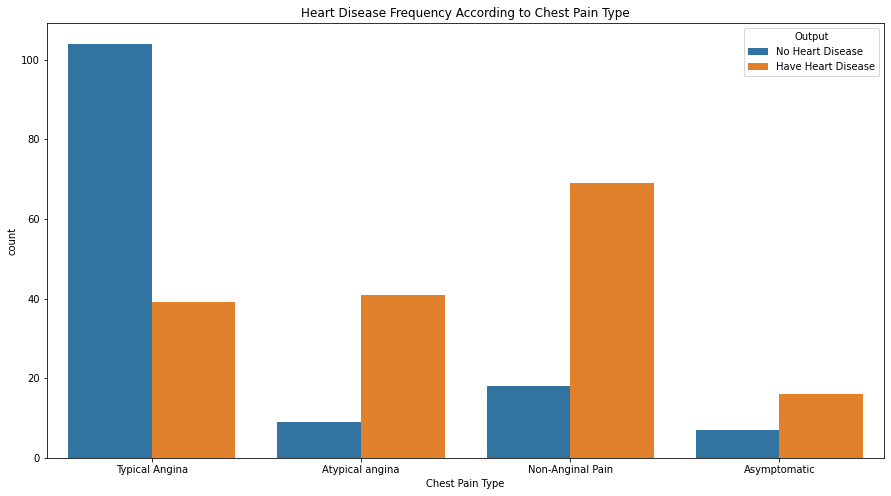

In [ ]:
# plt.figure(figsize = (55, 10))
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'cp', hue = 'output', data = df)
ax.set_xticklabels(['Typical Angina', 'Atypical angina', 'Non-Anginal Pain', 'Asymptomatic'])
ax.set_title('Heart Disease Frequency According to Chest Pain Type')
plt.legend(title = 'Output', loc = 'upper right', labels = ['No Heart Disease', 'Have Heart Disease'])
plt.xlabel('Chest Pain Type')
plt.show()

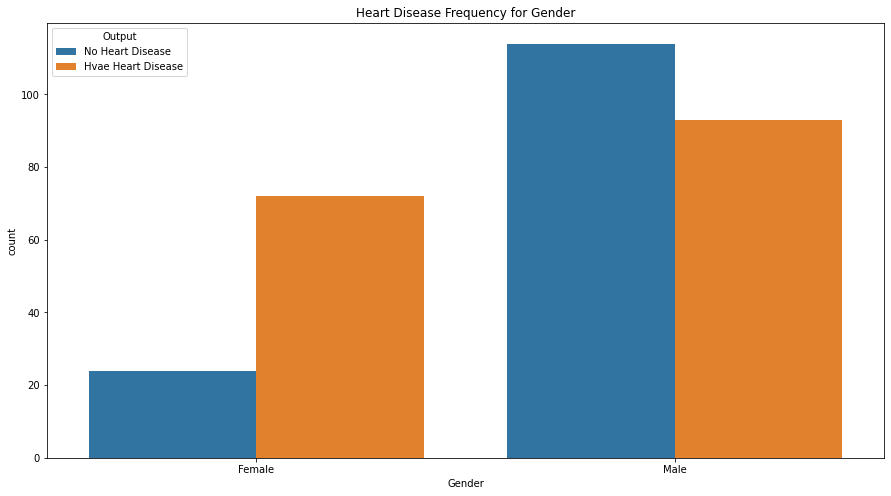

In [ ]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'sex', hue = 'output', data = df)
ax.set_xticklabels(['Female', 'Male'])
ax.set_title('Heart Disease Frequency for Gender')
plt.legend(title = 'Output', loc = 'upper left', labels = ['No Heart Disease', 'Hvae Heart Disease'])
plt.xlabel('Gender')
plt.show()

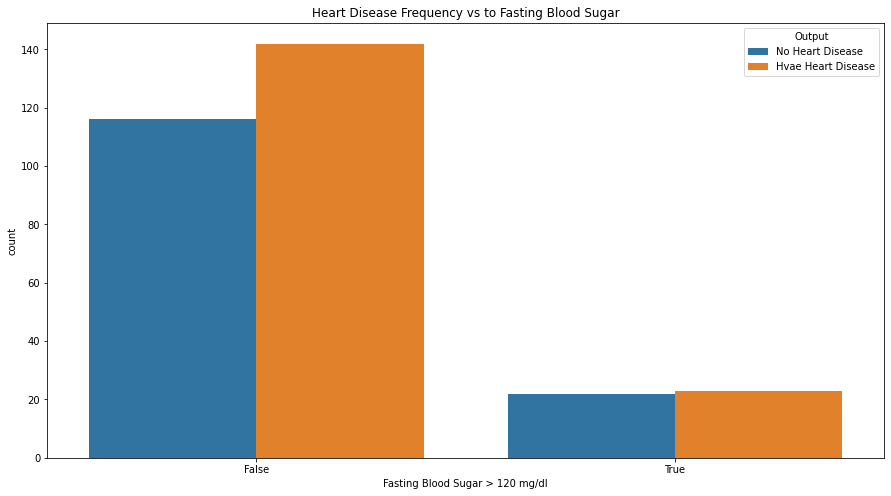

In [ ]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'fbs', hue = 'output', data = df)
ax.set_xticklabels(['False', 'True'])
ax.set_title('Heart Disease Frequency vs to Fasting Blood Sugar')
plt.legend(title = 'Output', loc = 'upper right', labels = ['No Heart Disease', 'Hvae Heart Disease'])
plt.xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.show()

In [ ]:
#Describing dataset
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#chaching null value
df.isnull().sum()
# null value is not present so no need to handle null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:

df[df.duplicated(keep = False)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
# drop the duplicated row
df.drop_duplicates(keep = 'first', inplace = True)


### checking corelation between different features for selection of features

In [ ]:
# check correlations between all variables
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


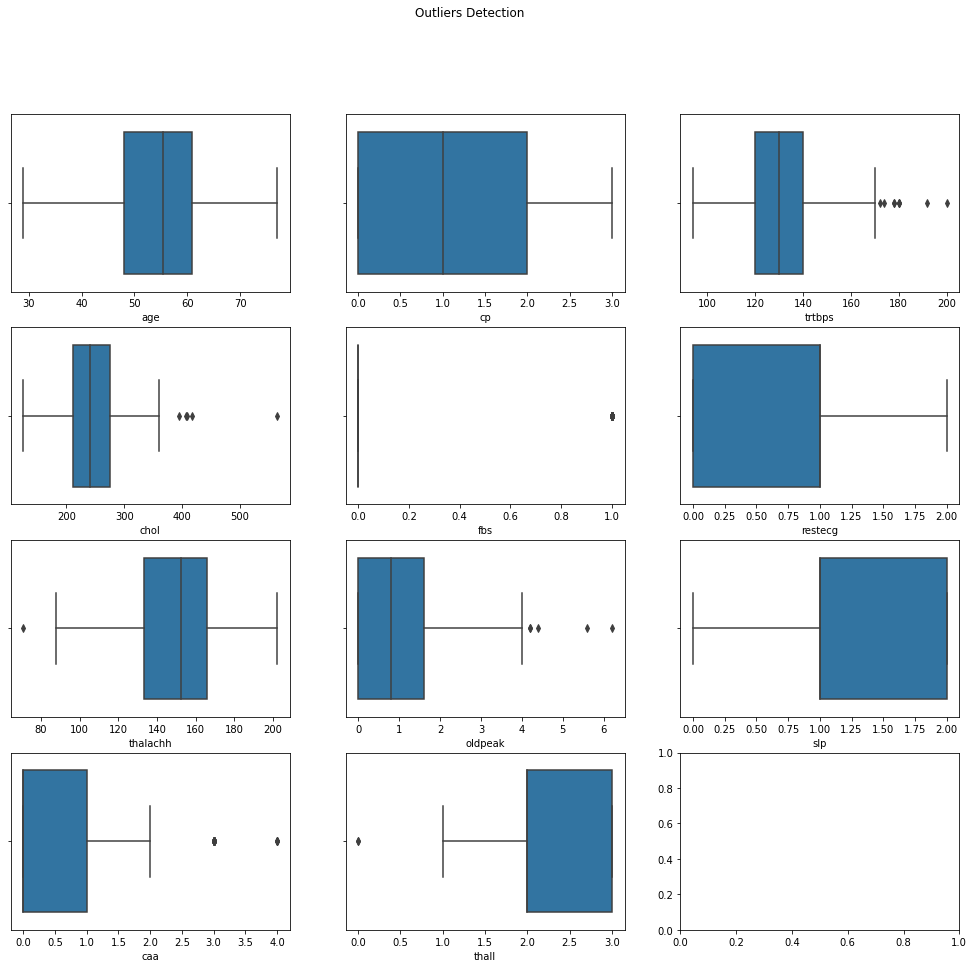

In [ ]:
#outlier detection
fig, axes = plt.subplots(4, 3, figsize = (17, 15))
fig.suptitle('Outliers Detection')
sns.boxplot(ax = axes[0,0], x = df['age'])
sns.boxplot(ax = axes[0,1], x = df['cp'])
sns.boxplot(ax = axes[0,2], x = df['trtbps'])
sns.boxplot(ax = axes[1,0], x = df['chol'])
sns.boxplot(ax = axes[1,1], x = df['fbs'])
sns.boxplot(ax = axes[1,2], x = df['restecg'])
sns.boxplot(ax = axes[2,0], x = df['thalachh'])
sns.boxplot(ax = axes[2,1], x = df['oldpeak'])
sns.boxplot(ax = axes[2,2], x = df['slp'])
sns.boxplot(ax = axes[3,0], x = df['caa'])
sns.boxplot(ax = axes[3,1], x = df['thall'])

### 2. Checking distribution of non catagorical variable e.g age,trtbps, chol and thalachh

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


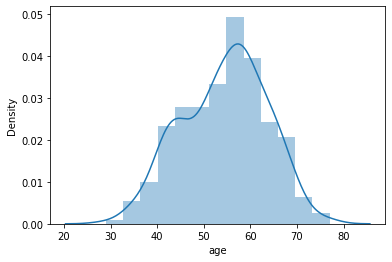

In [ ]:
print(sns.distplot(df['age']))
# age is non catagorical feature distributed normally

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


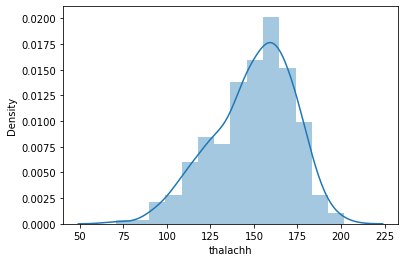

In [ ]:
print(sns.distplot(df['thalachh']))
# thalachh is non catagorical feature distributed normally

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


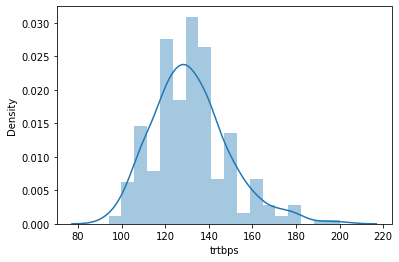

In [ ]:
print(sns.distplot(df['trtbps']))
# trtbps is non catagorical feature distributed normally

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


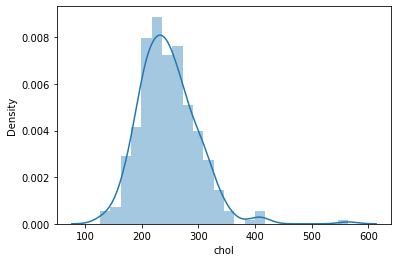

In [ ]:
print(sns.distplot(df['chol']))
# chol is non catagorical feature distributed normally

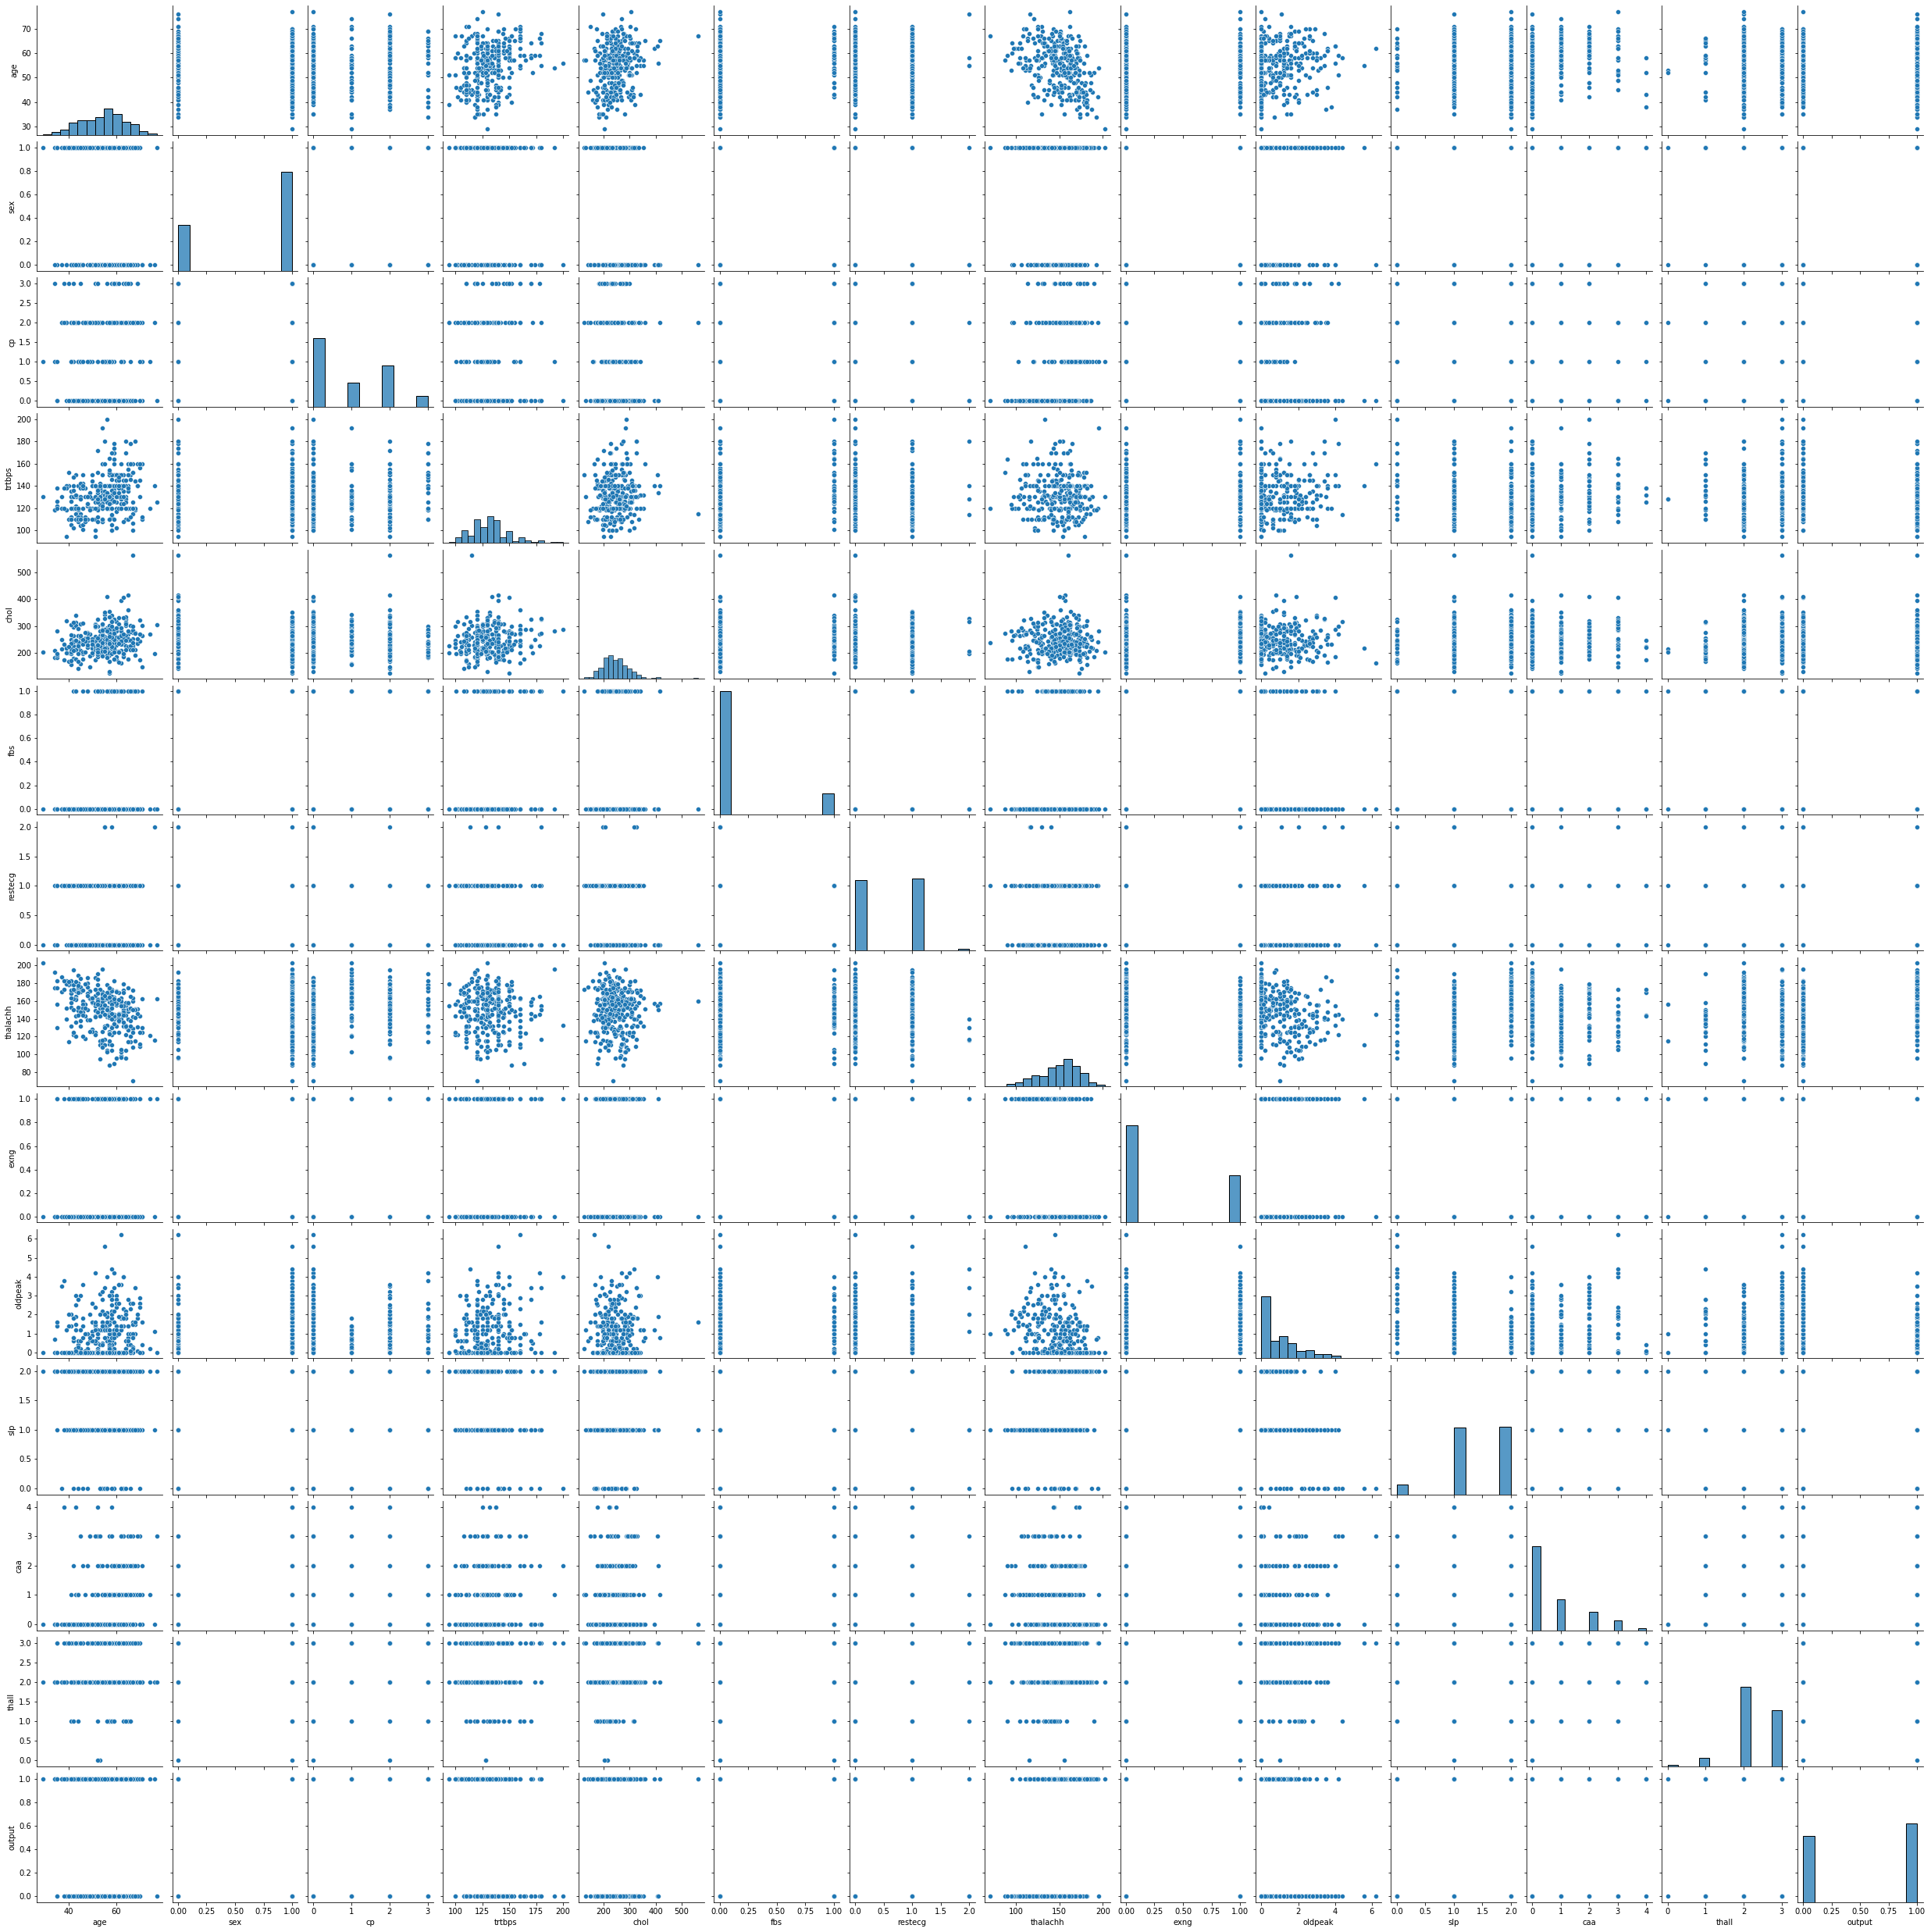

In [ ]:
sns.pairplot(data=df)

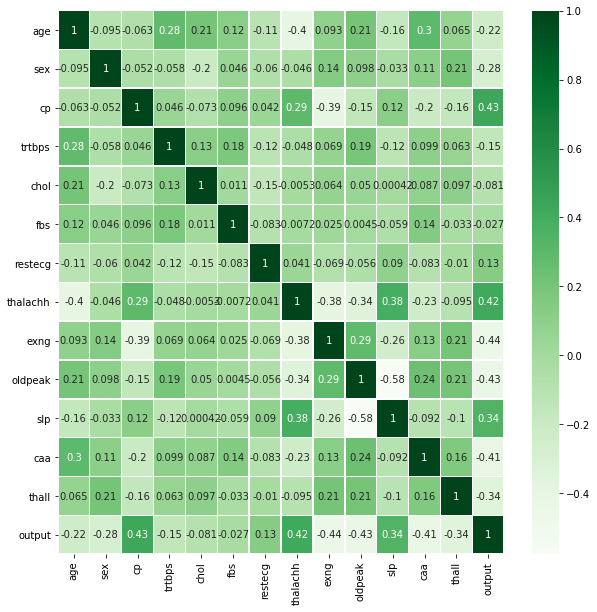

In [ ]:
fig,ax= plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Greens',annot=True,linewidths=.5,ax=ax)

In [ ]:
x=df.drop(['output'],axis=1)
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y=df['output']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_train)
print(y_train)

(241, 13)
(241,)
     age  sex  cp  trtbps  chol  fbs  ...  thalachh  exng  oldpeak  slp  caa  thall
74    43    0   2     122   213    0  ...       165     0      0.2    1    0      2
153   66    0   2     146   278    0  ...       152     0      0.0    1    1      2
64    58    1   2     140   211    1  ...       165     0      0.0    2    0      2
296   63    0   0     124   197    0  ...       136     1      0.0    1    0      2
288   57    1   0     110   335    0  ...       143     1      3.0    1    1      3
..   ...  ...  ..     ...   ...  ...  ...       ...   ...      ...  ...  ...    ...
252   62    0   0     138   294    1  ...       106     0      1.9    1    3      2
193   60    1   0     145   282    0  ...       142     1      2.8    1    2      3
117   56    1   3     120   193    0  ...       162     0      1.9    1    0      3
47    47    1   2     138   257    0  ...       156     0      0.0    2    0      2
173   58    1   2     132   224    0  ...       173     0  

In [ ]:
print(x_test.shape)
print(y_test.shape)
print(x_test)
print(y_test)

(61, 13)
(61,)
     age  sex  cp  trtbps  chol  fbs  ...  thalachh  exng  oldpeak  slp  caa  thall
226   62    1   1     120   281    0  ...       103     0      1.4    1    1      3
152   64    1   3     170   227    0  ...       155     0      0.6    1    0      3
229   64    1   2     125   309    0  ...       131     1      1.8    1    0      3
202   58    1   0     150   270    0  ...       111     1      0.8    2    0      3
52    62    1   2     130   231    0  ...       146     0      1.8    1    3      3
..   ...  ...  ..     ...   ...  ...  ...       ...   ...      ...  ...  ...    ...
146   44    0   2     118   242    0  ...       149     0      0.3    1    1      2
302   57    0   1     130   236    0  ...       174     0      0.0    1    1      2
26    59    1   2     150   212    1  ...       157     0      1.6    2    0      2
108   50    0   1     120   244    0  ...       162     0      1.1    2    0      2
89    58    0   0     100   248    0  ...       122     0    

In [ ]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
print(sc.fit_transform(x_train))
print('\n')
print(sc.transform(x_test))

[[-1.30504994 -1.4186261   0.98544689 ... -0.61492051 -0.70674006
  -0.49876142]
 [ 1.25925059 -1.4186261   0.98544689 ... -0.61492051  0.29516791
  -0.49876142]
 [ 0.36731998  0.70490738  0.98544689 ...  0.99590387 -0.70674006
  -0.49876142]
 ...
 [ 0.14433732  0.70490738  1.94307874 ... -0.61492051 -0.70674006
   1.1478345 ]
 [-0.85908463  0.70490738  0.98544689 ...  0.99590387 -0.70674006
  -0.49876142]
 [ 0.36731998  0.70490738  0.98544689 ...  0.99590387  1.29707587
   1.1478345 ]]


[[ 0.81328528  0.70490738  0.02781503 -0.67462818  0.65089023 -0.40527917
  -0.97525383 -1.96657306 -0.6983225   0.27236593 -0.61492051  0.29516791
   1.1478345 ]
 [ 1.03626794  0.70490738  1.94307874  2.19385084 -0.36856884 -0.40527917
  -0.97525383  0.23525787 -0.6983225  -0.39657867 -0.61492051 -0.70674006
   1.1478345 ]
 [ 1.03626794  0.70490738  0.98544689 -0.38778028  1.17949864 -0.40527917
   0.90503556 -0.78097179  1.43200311  0.60683823 -0.61492051 -0.70674006
   1.1478345 ]
 [ 0.36731998  0.

# Model Building

###### 1. LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=10)
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred1=logreg.predict(x_test)

In [ ]:

acc1=accuracy_score(y_pred1,y_test)
acc1

0.8524590163934426

In [ ]:
mse1=mean_squared_error(y_pred1,y_test)
mse1




0.14754098360655737

In [ ]:
rmse1=sqrt(mse1)
rmse1

0.3841106397986879

###### 2. Support vector classifier

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred2=svc.predict(x_test)


In [ ]:
acc2=accuracy_score(y_pred2,y_test)
acc2


0.7049180327868853

In [ ]:
mse2=mean_squared_error(y_pred2,y_test)
mse2

0.29508196721311475

In [ ]:
rmse2=sqrt(mse2)
rmse2

0.5432144762551112

###### 3. RandomForestClassifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=300, criterion="gini",random_state=5,max_depth=100)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [ ]:
y_pred3=rfc.predict(x_test)


In [ ]:
acc3=accuracy_score(y_pred3,y_test)
acc3

0.8688524590163934

In [ ]:
mse3=mean_squared_error(y_test,y_pred3)
mse3

0.13114754098360656

In [ ]:
rmse3=sqrt(mse3)
rmse3

0.3621429841700741

###### 4. DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred4=dtc.predict(x_test)

In [ ]:
acc4=accuracy_score(y_pred4,y_test)
acc4

0.7868852459016393

In [ ]:
mse4=mean_squared_error(y_pred4,y_test)
mse4


0.21311475409836064

In [ ]:
rmse4=sqrt(mse4)
rmse4

0.4616435357484827

###### 5. NaiveBayesClassifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)



GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred5=gnb.predict(x_test)
acc5=accuracy_score(y_pred5,y_test)
acc5


0.9016393442622951

In [ ]:
mse5=mean_squared_error(y_pred5,y_test)
mse5

0.09836065573770492

In [ ]:
rmse5=sqrt(mse5)
rmse5

0.31362502409359

###### 6. K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
y_pred6=knn.predict(x_test)


In [ ]:
acc6=accuracy_score(y_pred6,y_test)
acc6

0.6721311475409836

In [ ]:
mse6=mean_squared_error(y_pred6,y_test)
mse6

0.32786885245901637

In [ ]:
rmse6=sqrt(mse6)
rmse6


0.5725983343138682

# Model Comparison
1. test accuracy
2. test mse
3. rmse


In [ ]:
data={ 'LogisticRegression':[acc1,mse1,rmse1],'SupportVectorClassifier':[acc2,mse2,rmse2],'RandomForestClassifier'
      :[acc3,mse3,rmse3],'DecisionTreeClassifier':[acc4,mse4,rmse4],'GaussianNB':[acc5,mse5,rmse5],'KNN':[acc6,mse6,rmse6]}

In [ ]:
df1=pd.DataFrame(data,index =['ACCURACY','MSE','RMSE'])
df1

,LogisticRegression,SupportVectorClassifier,RandomForestClassifier,DecisionTreeClassifier,GaussianNB,KNN
ACCURACY,0.852459,0.704918,0.868852,0.786885,0.901639,0.672131
MSE,0.147541,0.295082,0.131148,0.213115,0.098361,0.327869
RMSE,0.384111,0.543214,0.362143,0.461644,0.313625,0.572598


## testing using 5 record

In [ ]:
#here we take 5 record of our test data to check whether it work on less amount of data or not  
x=x_test.head()
y=y_test.head()
print(x)
print('\n')
print(y)



     age  sex  cp  trtbps  chol  fbs  ...  thalachh  exng  oldpeak  slp  caa  thall
226   62    1   1     120   281    0  ...       103     0      1.4    1    1      3
152   64    1   3     170   227    0  ...       155     0      0.6    1    0      3
229   64    1   2     125   309    0  ...       131     1      1.8    1    0      3
202   58    1   0     150   270    0  ...       111     1      0.8    2    0      3
52    62    1   2     130   231    0  ...       146     0      1.8    1    3      3

[5 rows x 13 columns]


226    0
152    1
229    0
202    0
52     1
Name: output, dtype: int64


In [ ]:
## we use all the 6 model
##logistic regression
y_p1=logreg.predict(x)
print(y_p1)
print(y)
##3rd and 5th wrong

[0 1 0 0 0]
226    0
152    1
229    0
202    0
52     1
Name: output, dtype: int64


In [ ]:
##support vector regression/classifier
y_p2=svc.predict(x)
print(y_p2)
print(y)
##3rd and 4th wrong 

[0 1 0 0 1]
226    0
152    1
229    0
202    0
52     1
Name: output, dtype: int64


In [ ]:
##random forest classifier
y_p3=rfc.predict(x)
print(y_p3)
print(y)
##3rd and 5th wrong

[0 1 0 0 0]
226    0
152    1
229    0
202    0
52     1
Name: output, dtype: int64


In [ ]:
#Decission tree classifier
y_p4=dtc.predict(x)
print(y_p4)
print(y)
##3rd and 5th wrong

[0 1 0 0 1]
226    0
152    1
229    0
202    0
52     1
Name: output, dtype: int64


In [ ]:
## Naive bayes classifier
y_p5=gnb.predict(x)
print(y_p5)
print(y)
##3rd and 5th wrong

[0 1 0 0 0]
226    0
152    1
229    0
202    0
52     1
Name: output, dtype: int64


In [ ]:
#KNN classifier 
y_p6=knn.predict(x)
print(y_p6)
print(y)
##3rd is wrong only

[0 1 0 0 1]
226    0
152    1
229    0
202    0
52     1
Name: output, dtype: int64
